In [ ]:
import os, json, numpy as np, pandas as pd, math
from pathlib import Path
from pprint import pprint

In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [ ]:
train_file = "/content/z639_assignment1_training.json"
test_file  = "/content/z639_assignment1_test.json"

train_df = pd.read_json(train_file, lines=True)
test_df  = pd.read_json(test_file, lines=True)

In [ ]:
print("train rows:", len(train_df), "test rows:", len(test_df))

train rows: 4000 test rows: 500


In [ ]:
train_df.head()

,text,parent_comment,article_title,article_url,platform,platform_id,composite_toxic
0,"WTF, y'all never made MRE fart balloons in the...",None,Triangular UFO hovers over California military...,https://www.dailymail.co.uk/news/article-12112...,reddit,jlcm021,"[[False, 74], [True, 323], [False, 1028], [Fal..."
1,No apologies !! McCall has balls ! Ccp is not...,None,China sentences elderly US citizen to life in ...,https://www.cnn.com/2023/05/15/china/china-jai...,youtube,Ugws8gNW7eJyE9VHeM14AaABAg,"[[False, 216], [False, 197], [False, 1039], [F..."
2,What ever you need to tell yourself to sleep a...,I wonder how many undercover agents will be go...,Jan. 6 defendant who put foot on desk in Pelos...,https://www.cbsnews.com/news/richard-barnett-j...,youtube,UgxHlqwNcVssLHUr4yF4AaABAg.9q7kOunSlu-9q7lHH4he6S,"[[True, 192], [True, 193], [True, 260], [True,..."
3,@exZACKly @CBSNews Fuck off Nazi,@NCmylo @CBSNews Lol. Stop choosing to be an ...,19-year-old Missouri man arrested in U-Haul cr...,https://www.cbsnews.com/news/u-haul-crash-lafa...,twitter,1661025155047637000,"[[True, 92], [False, 218], [True, 69], [True, ..."
4,Texas is a republican sponsored killing ground...,None,At Least 8 Killed After Driver Plows Car Into ...,https://www.nytimes.com/2023/05/07/us/car-pede...,youtube,UgwpAfn9RIV0cHfhp4R4AaABAg,"[[False, 56], [True, 207], [False, 218], [Fals..."


In [ ]:
test_df.head()

,text,parent_comment,article_title,article_url,platform,platform_id
0,Ukrainian Bullshit.,Russian Propaganda,Kremlin drone: Zelensky denies Ukraine attacke...,https://www.bbc.com/news/world-europe-65471904,youtube,UgxjV6HRpnD6FUmw8aV4AaABAg.9pH-CgX5yEH9pH7BMIfAz5
1,@LibDems No one likes you.\nYou denied democra...,None,"UK economy shrank 0.3% in March, ONS figures show",https://news.sky.com/story/uk-economy-shrank-0...,twitter,1657052099564150784
2,@EPurpera @BBCNews POS terrorist dictator Putr...,@BBCNews They should make peace talk.,Ukraine war: Kyiv hit by new massive Russian d...,https://www.bbc.com/news/world-65736730,twitter,1662672469205958656
3,@howardfineman @darkblue714 Bullshit. CNN set ...,None,Opinion | Why CNN's Trump town hall was always...,https://www.msnbc.com/opinion/msnbc-opinion/cn...,twitter,1656508255454019587
4,"The war will be won by who ""wins"" the race bet...",What is the pope gonna do? Pray and throw a co...,Zelenskyy to meet with Pope Francis at Vatican...,https://apnews.com/article/zelenskyy-italy-vis...,reddit,jk1pm1m


In [ ]:
train_df["composite_toxic"][1]

[[False, 216], [False, 197], [False, 1039], [False, 206], [True, 135]]

In [ ]:
def majority_label(composite):
    if not composite or not isinstance(composite, (list, tuple)):
        return np.nan

    labels = []
    for ann in composite:
        try:
            lbl = ann[0]
            if isinstance(lbl, str):
                lbl = lbl.strip().lower() in ("true", "1", "t", "yes")
            elif isinstance(lbl, (int, np.integer)):
                lbl = bool(lbl)
            elif not isinstance(lbl, bool):
                continue
            labels.append(1 if lbl else 0)
        except Exception:
            continue

    if len(labels) == 0:
        return np.nan

    return 1 if sum(labels) >= 3 else 0

In [ ]:
train_df['label'] = train_df['composite_toxic'].apply(majority_label)

In [ ]:
print("Dropped rows with no label:", train_df['label'].isna().sum())
train_df = train_df.dropna(subset=['label']).reset_index(drop=True)

Dropped rows with no label: 0


In [ ]:
train_df['label'] = train_df['label'].astype(int)

print(train_df.label.value_counts())

label
0    2974
1    1026
Name: count, dtype: int64


In [ ]:
train_df['input_text'] = train_df['text'].astype(str)
test_df['input_text']  = test_df['text'].astype(str)

**EDA** - **Exploratory Data Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(" Dataset Shape:", train_df.shape)
print("\n Column Overview:\n", train_df.columns.tolist())


 Dataset Shape: (4000, 11)

 Column Overview:
 ['text', 'parent_comment', 'article_title', 'article_url', 'platform', 'platform_id', 'composite_toxic', 'label', 'label_prob', 'label_votes', 'input_text']


In [ ]:
print("\nDataset Info:")
train_df.info()

print("\n Missing Values:")
print(train_df.isna().sum().sort_values(ascending=False))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   text             4000 non-null   object 
 1   parent_comment   1402 non-null   object 
 2   article_title    4000 non-null   object 
 3   article_url      4000 non-null   object 
 4   platform         4000 non-null   object 
 5   platform_id      4000 non-null   object 
 6   composite_toxic  4000 non-null   object 
 7   label            4000 non-null   int64  
 8   label_prob       4000 non-null   float64
 9   label_votes      4000 non-null   float64
 10  input_text       4000 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 343.9+ KB

 Missing Values:
parent_comment     2598
text                  0
article_title         0
article_url           0
platform              0
platform_id           0
composite_toxic       0
label                 0
label_

/tmp/ipython-input-138214686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_df, palette='Set2')


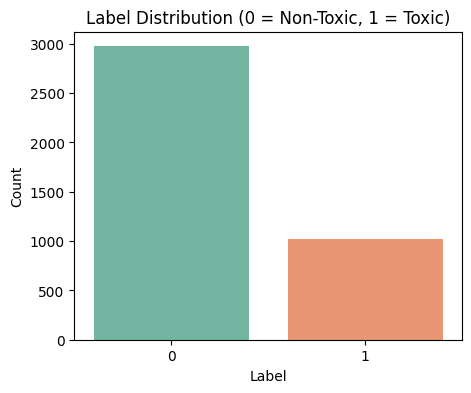


Label Value Counts:
label
0    74.4
1    25.6
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='label', data=train_df, palette='Set2')
plt.title("Label Distribution (0 = Non-Toxic, 1 = Toxic)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

print("\nLabel Value Counts:")
print(train_df['label'].value_counts(normalize=True).round(3) * 100)


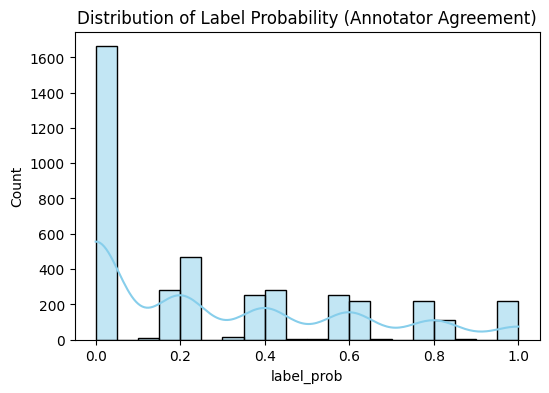

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(train_df['label_prob'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Label Probability (Annotator Agreement)")
plt.xlabel("label_prob")
plt.show()


In [ ]:
print("\n Descriptive Stats (label_prob):")
print(train_df['label_prob'].describe())


 Descriptive Stats (label_prob):
count    4000.000000
mean        0.285132
std         0.314504
min         0.000000
25%         0.000000
50%         0.200837
75%         0.576380
max         1.000000
Name: label_prob, dtype: float64


/tmp/ipython-input-2317382544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_votes', data=train_df, palette='viridis')


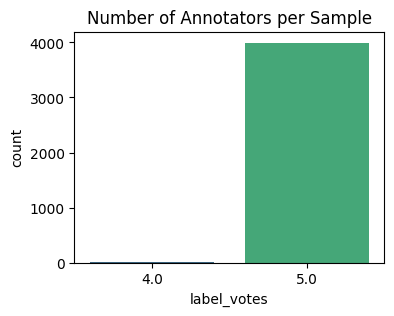

In [ ]:
plt.figure(figsize=(4,3))
sns.countplot(x='label_votes', data=train_df, palette='viridis')
plt.title("Number of Annotators per Sample")
plt.show()

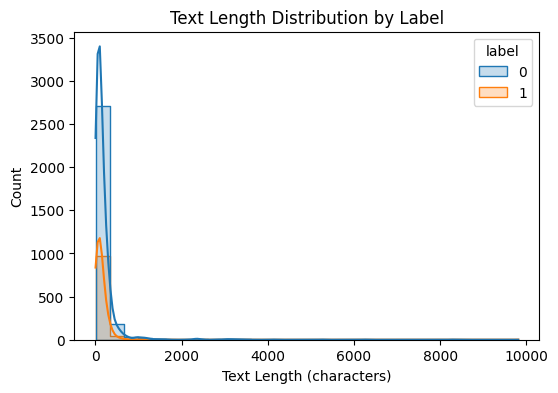


 Average Text Length by Label:
label
0    173.030935
1    134.857700
Name: text_len, dtype: float64


In [ ]:
train_df['text_len'] = train_df['text'].astype(str).apply(len)

plt.figure(figsize=(6,4))
sns.histplot(data=train_df, x='text_len', hue='label', bins=30, kde=True, element="step")
plt.title("Text Length Distribution by Label")
plt.xlabel("Text Length (characters)")
plt.show()

print("\n Average Text Length by Label:")
print(train_df.groupby('label')['text_len'].mean())

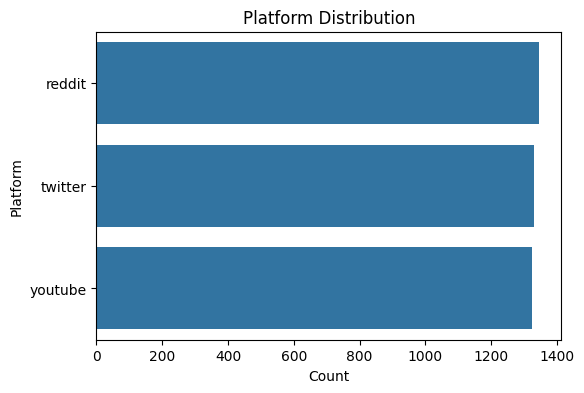


 Average Toxicity per Platform:
platform
twitter    0.291510
youtube    0.284958
reddit     0.193908
Name: Toxic_Rate, dtype: float64


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(y='platform', data=train_df, order=train_df['platform'].value_counts().index)
plt.title("Platform Distribution")
plt.xlabel("Count")
plt.ylabel("Platform")
plt.show()

toxicity_by_platform = (
    train_df.groupby('platform')['label']
    .mean()
    .sort_values(ascending=False)
    .rename('Toxic_Rate')
)
print("\n Average Toxicity per Platform:")
print(toxicity_by_platform)


In [ ]:
top_articles = train_df['article_title'].value_counts().head(10)
print("\n Top 10 Most Commented Articles:")
print(top_articles)


 Top 10 Most Commented Articles:
article_title
FBI agents raid condo unit owned by Russians at Trump Towers in Sunny Isles        6
Carlson’s Text That Alarmed Fox Leaders: ‘It’s Not How White Men Fight’            6
Russia issues arrest warrant for Lindsey Graham after Ukraine comments             4
Penguin Random House sues Florida school district over book bans                   4
York Catholic District School Board votes against flying the Pride flag in June    4
Police: Woman who was kidnapped outside of Detroit hospital found dead in Novi     3
House conservatives threaten push to oust McCarthy over debt deal                  3
Trump is accused in court of rape. Will it matter in 2024?                         3
Erdogan positioned to extend rule in Turkey runoff election                        3
Nord Stream: Report puts Russian navy ships near pipeline blast site               3
Name: count, dtype: int64


In [ ]:
dupes = train_df.duplicated(subset=['text']).sum()
print(f"\n Duplicate texts: {dupes}")

empty_text = train_df['text'].astype(str).str.strip().eq("").sum()
print(f" Empty text entries: {empty_text}")



 Duplicate texts: 3
 Empty text entries: 0


Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split

tr, val = train_test_split(
    train_df,
    test_size=0.12,
    random_state=42,
    stratify=train_df['label']
)

 -------------------------------
# Baseline Model: TF-IDF + Logistic Regression
 -------------------------------


In [ ]:
import re
import json

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_recall_curve
import joblib

In [ ]:
tr, val = train_test_split(
    train_df,
    test_size=0.12,
    random_state=42,
    stratify=train_df['label']
)

In [ ]:
URL_RE   = re.compile(r'https?://\S+|www\.\S+')
USER_RE  = re.compile(r'@\w+')
NUM_RE   = re.compile(r'\d+')
WS_RE    = re.compile(r'\s+')
PUNC_RE  = re.compile(r'[^\w\s]')

def clean_text(x: str) -> str:
    if x is None:
        return ""
    s = str(x)
    s = URL_RE.sub(" URL ", s)
    s = USER_RE.sub(" USER ", s)
    s = NUM_RE.sub(" NUM ", s)
    s = PUNC_RE.sub(" ", s)
    s = WS_RE.sub(" ", s).strip()
    return s

In [ ]:
features = ColumnTransformer(
    transformers=[
        ("w", TfidfVectorizer(
            analyzer="word",
            ngram_range=(1, 2),
            max_features=25000,
            min_df=2,
            max_df=0.9,
            stop_words="english",
            strip_accents="unicode",
            sublinear_tf=True,
            preprocessor=clean_text,
            lowercase=True
        ), "input_text"),
        ("c", TfidfVectorizer(
            analyzer="char_wb",
            ngram_range=(3, 5),
            min_df=2,
            sublinear_tf=True,
            preprocessor=clean_text,
            lowercase=True
        ), "input_text"),
    ],
    remainder="drop"
)

clf = LogisticRegression(
    solver="saga",
    penalty="elasticnet",
    max_iter=3000,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

pipe = Pipeline([
    ("feat", features),
    ("clf", clf),
])

param_grid = {
    "clf__C": [0.25, 0.5, 1.0, 2.0],
    "clf__l1_ratio": [0.0, 0.25, 0.5, 0.75],  # 0=L2 … 1=L1
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=cv,
    n_jobs=-1,
    verbose=1
)


In [ ]:
# ---------- Train ----------
grid.fit(tr[["input_text"]], tr["label"])
best_pipe = grid.best_estimator_
print("Best params:", grid.best_params_)
print("Best CV f1_macro:", grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best params: {'clf__C': 1.0, 'clf__l1_ratio': 0.25}
Best CV f1_macro: 0.675486038622546


In [ ]:
# ---------- Threshold tuning on val ----------
val_probs = best_pipe.predict_proba(val[["input_text"]])[:, 1]
prec, rec, thresh = precision_recall_curve(val["label"], val_probs)
f1s = 2 * (prec * rec) / np.clip(prec + rec, 1e-12, None)
best_idx = int(np.nanargmax(f1s))
best_thresh = 0.5 if best_idx >= len(thresh) else float(thresh[best_idx])
print(f"Chosen threshold for F1: {best_thresh:.4f}")

Chosen threshold for F1: 0.5174


In [ ]:
val_preds = (val_probs >= best_thresh).astype(int)
print("\n=== Robust TF-IDF (word+char) + ElasticNet LR ===")
print("Accuracy:", accuracy_score(val["label"], val_preds))
print("F1 (macro):", f1_score(val["label"], val_preds, average="macro"))
print(classification_report(val["label"], val_preds, digits=4))


=== Robust TF-IDF (word+char) + ElasticNet LR ===
Accuracy: 0.7916666666666666
F1 (macro): 0.7309658326607479
              precision    recall  f1-score   support

           0     0.8661    0.8515    0.8588       357
           1     0.5891    0.6179    0.6032       123

    accuracy                         0.7917       480
   macro avg     0.7276    0.7347    0.7310       480
weighted avg     0.7951    0.7917    0.7933       480



In [ ]:
joblib.dump(best_pipe, "tfidf_lr_robust.joblib")
with open("tfidf_lr_robust.threshold.json", "w") as f:
    json.dump({"threshold": best_thresh}, f)
print("Saved tfidf_lr_robust.joblib and tfidf_lr_robust.threshold.json")

Saved tfidf_lr_robust.joblib and tfidf_lr_robust.threshold.json


### ML Inference on Test Data

In [ ]:
pipe = joblib.load("tfidf_lr_robust.joblib")
try:
    with open("tfidf_lr_robust.threshold.json", "r") as f:
        BEST_THRESH = float(json.load(f)["threshold"])
except Exception:
    BEST_THRESH = 0.5
    print("Using default threshold 0.5 (threshold file not found).")


assert 'platform_id' in test_df.columns, "test_df must contain 'platform_id'."
assert 'input_text' in test_df.columns, "test_df must contain 'input_text'."

try:
    probs = pipe.predict_proba(test_df[['input_text']])[:, 1]
except Exception:
    probs = pipe.predict_proba(test_df['input_text'])[:, 1]

pred_int = (probs >= BEST_THRESH).astype(int)
pred_str = np.where(pred_int == 1, "true", "false")

submission = pd.DataFrame({
    "platform_id": test_df["platform_id"].astype(str),
    "prediction":  pred_str
})
submission.to_csv("submission_lr.csv", index=False)
print("Saved submission_lr.csv (columns: platform_id, prediction)")
print(submission.head())


Saved submission_lr.csv (columns: platform_id, prediction)
                                         platform_id prediction
0  UgxjV6HRpnD6FUmw8aV4AaABAg.9pH-CgX5yEH9pH7BMIfAz5      false
1                                1657052099564150784       true
2                                1662672469205958656      false
3                                1656508255454019587      false
4                                            jk1pm1m      false


-----------------
# BERT
------------------

In [ ]:
!pip install -q transformers datasets evaluate accelerate

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
from transformers import (AutoTokenizer, AutoModelForSequenceClassification,
                          TrainingArguments, Trainer, DataCollatorWithPadding)
import evaluate
from sklearn.metrics import classification_report

In [ ]:
MODEL   = "bert-base-uncased"
MAX_LEN = 192
BATCH   = 8
EPOCHS  = 4
LR      = 2e-5
SEED    = 42

rng = np.random.RandomState(SEED)
torch.manual_seed(SEED)

In [ ]:
tr, val = train_test_split(
    train_df[['input_text','label']].dropna(),
    test_size=0.12, random_state=SEED, stratify=train_df['label']
)


In [ ]:
# ===== HuggingFace Datasets =====
hf_train = Dataset.from_pandas(tr.reset_index(drop=True))
hf_val   = Dataset.from_pandas(val.reset_index(drop=True))
dsets    = DatasetDict({"train": hf_train, "validation": hf_val})

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL, use_fast=True)

def tok_fn(batch):
    return tokenizer(batch['input_text'], truncation=True, max_length=MAX_LEN)

dsets = dsets.map(tok_fn, batched=True, remove_columns=['input_text'])
dsets = dsets.rename_column("label", "labels")
dsets.set_format(type='torch')

Map:   0%|          | 0/3520 [00:00<?, ? examples/s]

Map:   0%|          | 0/480 [00:00<?, ? examples/s]

In [ ]:
# ===== Model =====
model = AutoModelForSequenceClassification.from_pretrained(MODEL, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# ===== Metrics =====
metric_acc = evaluate.load("accuracy")
metric_f1  = evaluate.load("f1")

In [ ]:
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {
        "accuracy": metric_acc.compute(predictions=preds, references=p.label_ids)["accuracy"],
        "f1_macro": metric_f1.compute(predictions=preds, references=p.label_ids, average="macro")["f1"]
    }

In [ ]:
training_args = TrainingArguments(
    output_dir="bert_base_toxic_ckpt",
    learning_rate=LR,
    per_device_train_batch_size=BATCH,
    per_device_eval_batch_size=BATCH*2,
    num_train_epochs=EPOCHS,
    weight_decay=0.01,
    logging_steps=50,
    seed=SEED,
    report_to=[]
)

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dsets["train"],
    eval_dataset=dsets["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

/tmp/ipython-input-1372441731.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# ===== Train =====
trainer.train()

Step,Training Loss
50,0.578700
100,0.576000
150,0.445500
200,0.492700
250,0.435600
300,0.472600
350,0.510300
400,0.469400
450,0.405500
500,0.337200


TrainOutput(global_step=1760, training_loss=0.27278139794414696, metrics={'train_runtime': 460.3617, 'train_samples_per_second': 30.585, 'train_steps_per_second': 3.823, 'total_flos': 683776299557760.0, 'train_loss': 0.27278139794414696, 'epoch': 4.0})

In [ ]:
# ===== Evaluate (valid set) =====
preds_out = trainer.predict(dsets["validation"])
preds = np.argmax(preds_out.predictions, axis=1)
print("Val metrics:", compute_metrics(preds_out))
print(classification_report(dsets["validation"]["labels"], preds, digits=4))

Val metrics: {'accuracy': 0.8041666666666667, 'f1_macro': 0.7328533535430087}
              precision    recall  f1-score   support

           0     0.8544    0.8880    0.8709       357
           1     0.6330    0.5610    0.5948       123

    accuracy                         0.8042       480
   macro avg     0.7437    0.7245    0.7329       480
weighted avg     0.7977    0.8042    0.8001       480



In [ ]:
# ===== Save model + tokenizer =====
trainer.save_model("bert_toxic_modelV2")
tokenizer.save_pretrained("bert_toxic_modelV2")
print("✅ Saved base BERT to ./bert_toxic_model")

✅ Saved base BERT to ./bert_toxic_model


### BERT inference on Test data

In [ ]:
try :
    val_logits = preds_out.predictions
    val_probs  = torch.softmax(torch.tensor(val_logits), dim=1).numpy()[:, 1]
    y_val      = preds_out.label_ids

    prec, rec, thr = precision_recall_curve(y_val, val_probs)
    f1s = 2 * (prec * rec) / (prec + rec + 1e-12)
    best_idx = int(np.nanargmax(f1s))
    BEST_THRESH = 0.5 if best_idx >= len(thr) else float(thr[best_idx])
except Exception:
    BEST_THRESH = 0.5

print(f"Using threshold: {BEST_THRESH:.4f}")

device = "cuda" if torch.cuda.is_available() else "cpu"
tok  = AutoTokenizer.from_pretrained("bert_toxic_model", use_fast=True)
bert = AutoModelForSequenceClassification.from_pretrained("bert_toxic_model").to(device).eval()

def batched(it, n=128):
    for i in range(0, len(it), n):
        yield it[i:i+n]

assert 'platform_id' in test_df.columns, "test_df must have a 'platform_id' column."
texts = test_df['input_text'].fillna("").astype(str).tolist()

all_probs = []
with torch.no_grad():
    for batch in batched(texts, 128):
        enc = tok(batch, truncation=True, max_length=128, padding=True, return_tensors="pt")
        enc = {k: v.to(device) for k, v in enc.items()}
        logits = bert(**enc).logits
        p = torch.softmax(logits, dim=1)[:, 1].detach().cpu().numpy()
        all_probs.append(p)

test_probs = np.concatenate(all_probs, axis=0)
test_pred_int = (test_probs >= BEST_THRESH).astype(int)
test_pred_str = np.where(test_pred_int == 1, "true", "false")

# Build and save the submission
submission = pd.DataFrame({
    "platform_id": test_df["platform_id"].astype(str),
    "prediction":  test_pred_str
})
submission.to_csv("submission_V2.csv", index=False)
print(submission.head())


Using threshold: 0.0056
                                         platform_id prediction
0  UgxjV6HRpnD6FUmw8aV4AaABAg.9pH-CgX5yEH9pH7BMIfAz5       true
1                                1657052099564150784       true
2                                1662672469205958656       true
3                                1656508255454019587      false
4                                            jk1pm1m      false


-------------